C:\Users\HP\AppData\Local\Temp\ipykernel_13548\3297046879.py:17: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH, parse_dates=['Date'])


Data loaded successfully!
Data range: 2020-01-22 to 2023-03-09


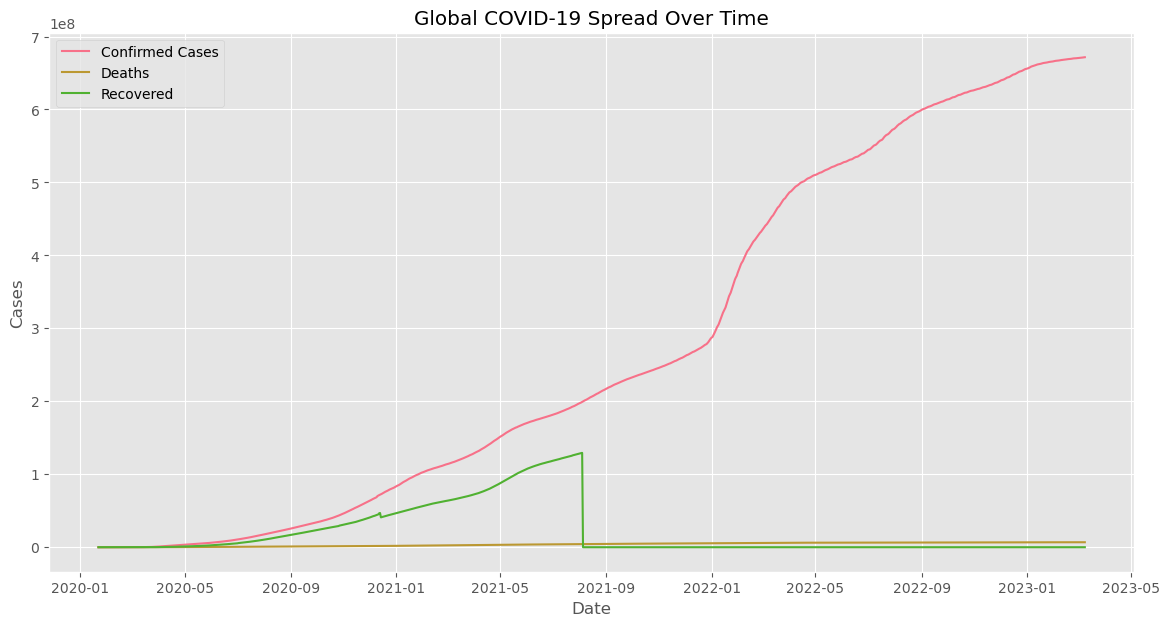

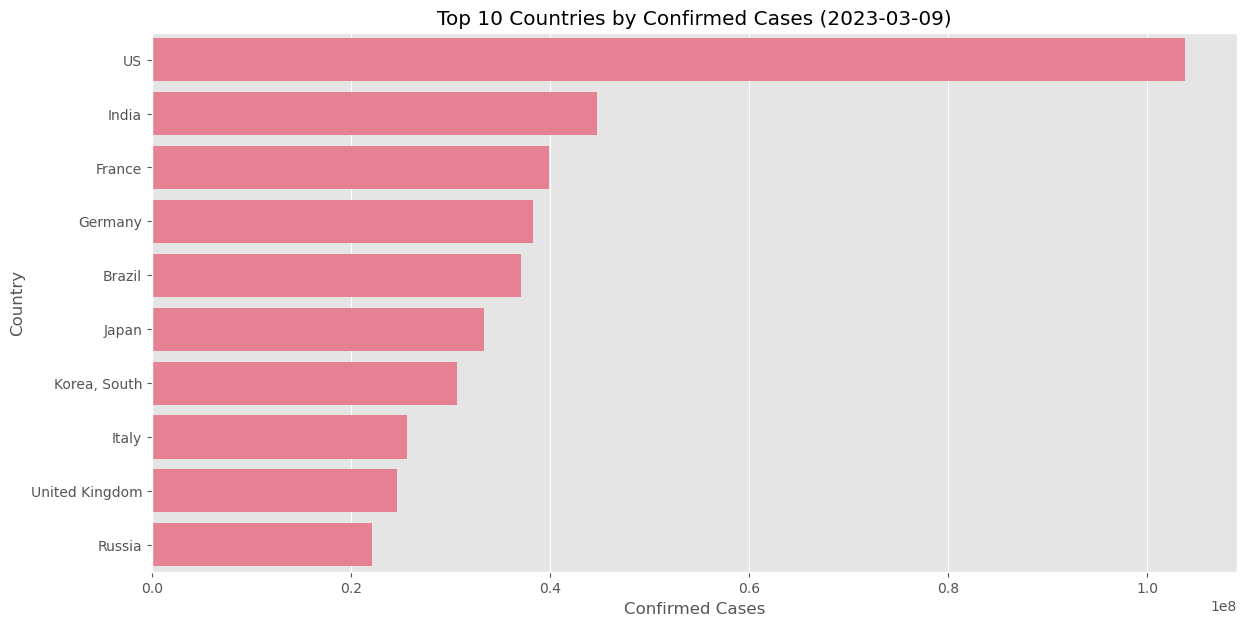

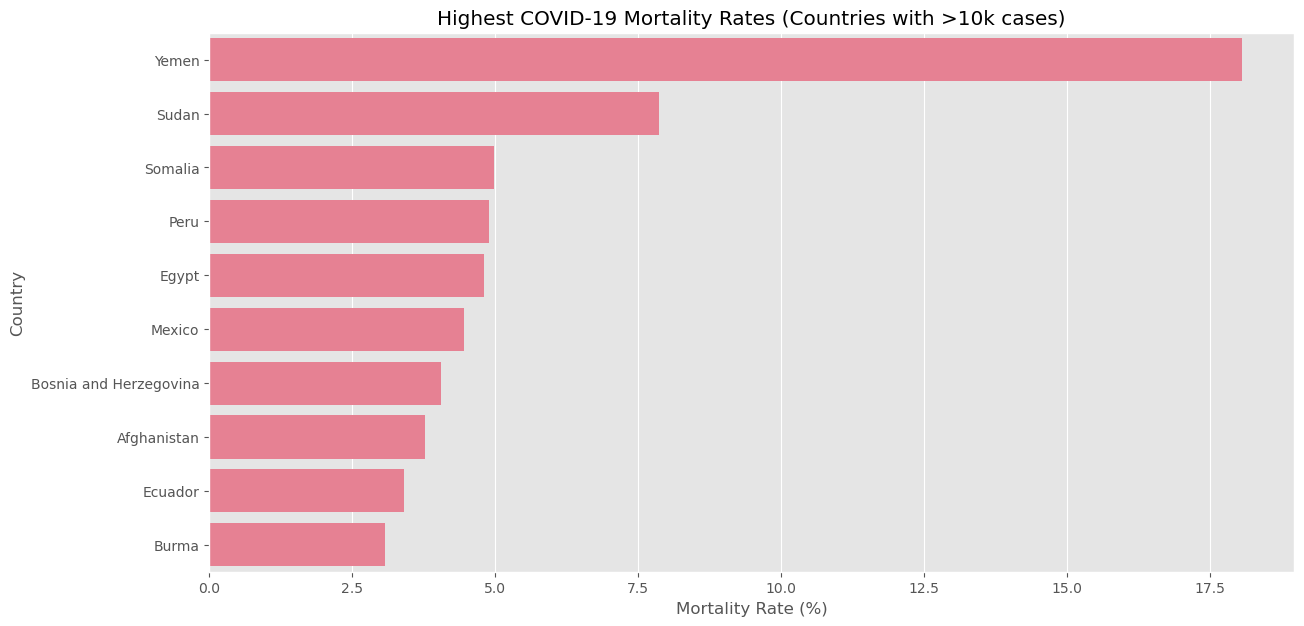

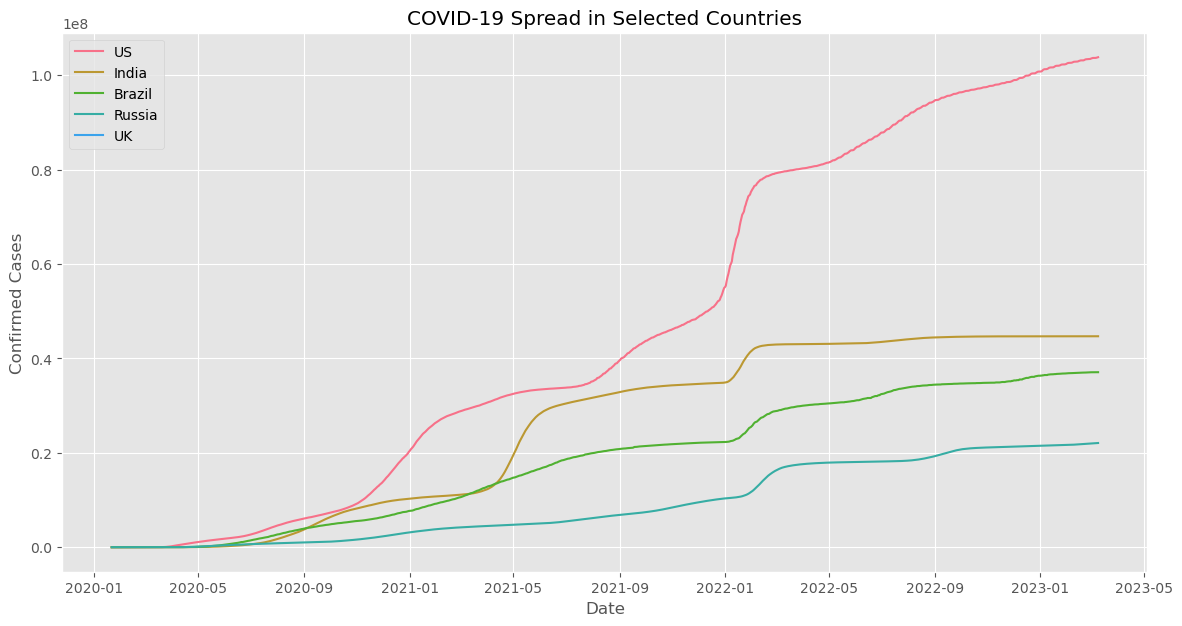


All visualizations saved to: C:\Users\HP\EOy\PLP\covid19-global-tracker\images


In [7]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuration
DATA_PATH = Path('..') / 'data' / 'processed_global_data.csv'
IMAGES_DIR = Path('../images')
IMAGES_DIR.mkdir(parents=True, exist_ok=True)  # Create images directory

plt.style.use('ggplot')
sns.set_palette("husl")

# Load processed data
try:
    df = pd.read_csv(DATA_PATH, parse_dates=['Date'])
    print("Data loaded successfully!")
    print(f"Data range: {df['Date'].min().date()} to {df['Date'].max().date()}")
except FileNotFoundError:
    print("Processed data not found. Run data processing script first!")

# Global Analysis
global_daily = df.groupby('Date').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

# Visualization 1: Global Spread
plt.figure(figsize=(14, 7))
plt.plot(global_daily['Date'], global_daily['Confirmed'], label='Confirmed Cases')
plt.plot(global_daily['Date'], global_daily['Deaths'], label='Deaths')
plt.plot(global_daily['Date'], global_daily['Recovered'], label='Recovered')
plt.title('Global COVID-19 Spread Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.savefig(IMAGES_DIR / 'global_trends.png', bbox_inches='tight')
plt.show()
plt.close()

# Country Analysis
latest_date = df['Date'].max()
country_data = df[df['Date'] == latest_date].groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).sort_values('Confirmed', ascending=False)

# Visualization 2: Top 10 Countries
plt.figure(figsize=(14, 7))
top_countries = country_data.head(10)
sns.barplot(x=top_countries['Confirmed'], y=top_countries.index)
plt.title(f'Top 10 Countries by Confirmed Cases ({latest_date.date()})')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.savefig(IMAGES_DIR / 'top_countries.png', bbox_inches='tight')
plt.show()
plt.close()

# Mortality Rate Analysis
country_data['Mortality Rate'] = (country_data['Deaths'] / country_data['Confirmed']) * 100
mortality_sorted = country_data[country_data['Confirmed'] > 10000].sort_values('Mortality Rate', ascending=False)

# Visualization 3: Mortality Rates
plt.figure(figsize=(14, 7))
sns.barplot(x=mortality_sorted['Mortality Rate'].head(10), 
            y=mortality_sorted.head(10).index)
plt.title('Highest COVID-19 Mortality Rates (Countries with >10k cases)')
plt.xlabel('Mortality Rate (%)')
plt.ylabel('Country')
plt.savefig(IMAGES_DIR / 'mortality_rates.png', bbox_inches='tight')
plt.show()
plt.close()

# Time Series Analysis for Selected Countries
countries = ['US', 'India', 'Brazil', 'Russia', 'UK']
filtered = df[df['Country/Region'].isin(countries)]

plt.figure(figsize=(14, 7))
for country in countries:
    country_df = filtered[filtered['Country/Region'] == country]
    plt.plot(country_df['Date'], country_df['Confirmed'], label=country)

plt.title('COVID-19 Spread in Selected Countries')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.savefig(IMAGES_DIR / 'country_comparison.png', bbox_inches='tight')
plt.show()
plt.close()

print(f"\nAll visualizations saved to: {IMAGES_DIR.resolve()}")